re- extracting the g140m data. First techniques from Bourrier papers. 

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [61]:
import stistools

In [62]:
path = '/home/david/work/muscles/trappist-1/hst/g140m_cals/'

In [63]:
dates = os.listdir(path)
dates= sorted(dates)
dates


['all_obs', 'staging', 'test']

Try just the test.

In [64]:
d1 = path + dates[2]

x1ds = glob.glob(d1+'/*x1d.fits')
x1ds

['/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01010_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01020_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v02010_x1d.fits']

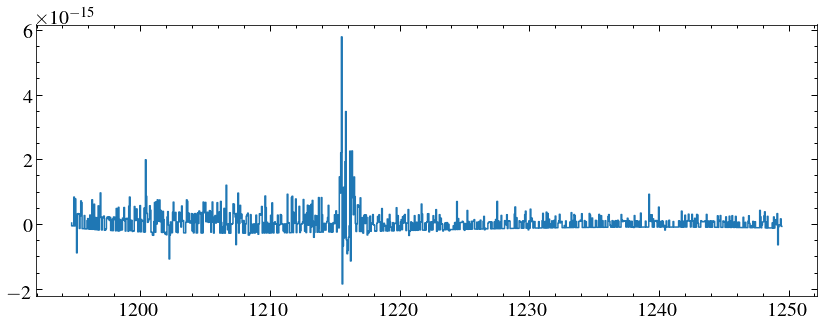

In [65]:
f = []
for x in x1ds:
    data = fits.getdata(x, 1)[0]
    #plt.step(data['WAVELENGTH'], data['FLUX'])
    f.append(data['FLUX'])
w = data['WAVELENGTH']
f = np.mean(np.array(f), axis=0)
plt.step(w,f)

So the objective is to do better than that.

In [66]:
fits.getheader(x1ds[0],0)['XTRACTAB']

'oref$n7p10323o_1dx.fits'

In [67]:
os.environ['oref'] = d1

In [68]:
bg = fits.open(d1+'/n7p10323o_1dx.fits')
bg.info()

Filename: /home/david/work/muscles/trappist-1/hst/g140m_cals/test/n7p10323o_1dx.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  1DX           1 BinTableHDU     79   343R x 18C   [16A, 8A, 1I, 1I, 1E, 1I, 8D, 1E, 1E, 1E, 1E, 1I, 8D, 1I, 12A, 1I, 67A, 67A]   


In [69]:
bgd = bg[1].data

In [70]:
bgd.names

['APERTURE',
 'OPT_ELEM',
 'CENWAVE',
 'SPORDER',
 'EXTRSIZE',
 'NCOEFFSL',
 'SLTCOEFF',
 'BK1SIZE',
 'BK2SIZE',
 'BK1OFFST',
 'BK2OFFST',
 'NCOEFFBK',
 'BKTCOEFF',
 'BACKORD',
 'XTRACALG',
 'MAXSRCH',
 'PEDIGREE',
 'DESCRIP']

In [71]:
bgd['CENWAVE']

array([1425, 1173, 1218, 1222, 1272, 1321, 1371, 1387, 1400, 1420, 1470,
       1518, 1540, 1550, 1567, 1616, 1640, 1665, 1714, 1425, 1173, 1218,
       1222, 1272, 1321, 1371, 1387, 1400, 1420, 1470, 1518, 1540, 1550,
       1567, 1616, 1640, 1665, 1714, 1425, 1173, 1218, 1222, 1272, 1321,
       1371, 1387, 1400, 1420, 1470, 1518, 1540, 1550, 1567, 1616, 1640,
       1665, 1714, 1425, 1173, 1218, 1222, 1272, 1321, 1371, 1387, 1400,
       1420, 1470, 1518, 1540, 1550, 1567, 1616, 1640, 1665, 1714, 1425,
       1173, 1218, 1222, 1272, 1321, 1371, 1387, 1400, 1420, 1470, 1518,
       1540, 1550, 1567, 1616, 1640, 1665, 1714, 1425, 1173, 1218, 1222,
       1272, 1321, 1371, 1387, 1400, 1420, 1470, 1518, 1540, 1550, 1567,
       1616, 1640, 1665, 1714, 1425, 1173, 1218, 1222, 1272, 1321, 1371,
       1387, 1400, 1420, 1470, 1518, 1540, 1550, 1567, 1616, 1640, 1665,
       1714, 1425, 1173, 1218, 1222, 1272, 1321, 1371, 1387, 1400, 1420,
       1470, 1518, 1540, 1550, 1567, 1616, 1640, 16

In [72]:
hdr = fits.getheader(x1ds[0],0)

In [73]:
cw=hdr['CENWAVE']

In [74]:
bgd[(bgd['CENWAVE']==cw) & (bgd['OPT_ELEM']=='G140M') & (bgd['APERTURE']==hdr['APERTURE']+'D1')]

FITS_rec([('52X0.05D1', 'G140M', 1222, 1, 11., 1, [0., 0., 0., 0., 0., 0., 0., 0.], 5., 5., -30., 30., 1, [-0.77999997,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ], 0, 'Unweighted', 1024, 'INFLIGHT 29/05/97', 'Analysis from prop. 7064')],
         dtype=(numpy.record, [('APERTURE', 'S16'), ('OPT_ELEM', 'S8'), ('CENWAVE', '>i2'), ('SPORDER', '>i2'), ('EXTRSIZE', '>f4'), ('NCOEFFSL', '>i2'), ('SLTCOEFF', '>f8', (8,)), ('BK1SIZE', '>f4'), ('BK2SIZE', '>f4'), ('BK1OFFST', '>f4'), ('BK2OFFST', '>f4'), ('NCOEFFBK', '>i2'), ('BKTCOEFF', '>f8', (8,)), ('BACKORD', '>i2'), ('XTRACALG', 'S12'), ('MAXSRCH', '>i2'), ('PEDIGREE', 'S67'), ('DESCRIP', 'S67')]))

In [75]:
hdr['APERTURE']

'52X0.05'

So if I make a new 1dx file with the adjusted background regions and re-reduce with that, it should work?

In [78]:
nbg = fits.open(d1+'/new_bg_1dx.fits')

In [80]:
np.where((bgd['CENWAVE']==cw) & (bgd['OPT_ELEM']=='G140M') & (bgd['APERTURE']==hdr['APERTURE']+'D1'))

(array([60]),)

In [82]:
bgd[60]

('52X0.05D1', 'G140M', 1222, 1, 11.0, 1, array([0., 0., 0., 0., 0., 0., 0., 0.]), 5.0, 5.0, -30.0, 30.0, 1, array([-0.77999997,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ]), 0, 'Unweighted', 1024, 'INFLIGHT 29/05/97', 'Analysis from prop. 7064')

In [83]:
edit = nbg[1].data[60]
edit

('52X0.05D1', 'G140M', 1222, 1, 11.0, 1, array([0., 0., 0., 0., 0., 0., 0., 0.]), 5.0, 5.0, -30.0, 30.0, 1, array([-0.77999997,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ]), 0, 'Unweighted', 1024, 'INFLIGHT 29/05/97', 'Analysis from prop. 7064')

B+ use backround regions of 6 to 20 pixels. How does that convert into what to edit? Where is the width measuered from - before or after the offset? Doesn't say in handbook - helpdesk?